In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">11_iris(다양한DNN)</font></b>

In [2]:
import os
import numpy as np
import pandas as pd # read_csv, get_dummies, crosstab
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU
from tensorflow.keras import metrics # compile
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
import matplotlib.pyplot as plt

# 1. 기본적인 DNN

In [4]:
# 1. 데이터 생성 및 전처리
from sklearn import datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y,
                                                   test_size=0.2,
                                                   stratify=iris_y)
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

In [5]:
# 2. 모델구성
model = Sequential([
    Input(4),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dropout(0.1),
    Dense(units=3, activation='softmax')    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                6450      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 30)                1530      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0

In [13]:
# 3. 학습과정 설정
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
# 4. 모델 학습
earlystopping = EarlyStopping(patience=40)# monitor='val_loss' 기본값
hist=model.fit(train_X,train_y,
               epochs=200,
               validation_split=0.1,
               callbacks=[earlystopping])

Epoch 1/200
3/3 [==============================] - 1s 73ms/step - loss: 1.1126 - accuracy: 0.3646 - val_loss: 0.9763 - val_accuracy: 0.4583
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 1.0417 - accuracy: 0.4792 - val_loss: 0.8417 - val_accuracy: 0.8750
Epoch 3/200
3/3 [==============================] - 0s 9ms/step - loss: 0.9379 - accuracy: 0.5417 - val_loss: 0.7736 - val_accuracy: 0.8333
Epoch 4/200
3/3 [==============================] - 0s 16ms/step - loss: 0.9153 - accuracy: 0.5104 - val_loss: 0.7284 - val_accuracy: 0.8333
Epoch 5/200
3/3 [==============================] - 0s 7ms/step - loss: 0.8088 - accuracy: 0.6875 - val_loss: 0.6755 - val_accuracy: 0.8333
Epoch 6/200
3/3 [==============================] - 0s 9ms/step - loss: 0.7810 - accuracy: 0.6562 - val_loss: 0.6306 - val_accuracy: 0.8333
Epoch 7/200
3/3 [==============================] - 0s 17ms/step - loss: 0.7518 - accuracy: 0.7188 - val_loss: 0.5813 - val_accuracy: 0.8333
Epoch 8/200
3/3 [=======

3/3 [==============================] - 0s 10ms/step - loss: 0.0602 - accuracy: 0.9792 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 118/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0773 - accuracy: 0.9896 - val_loss: 0.0607 - val_accuracy: 0.9583
Epoch 119/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0592 - accuracy: 0.9792 - val_loss: 0.0852 - val_accuracy: 0.9583
Epoch 120/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0779 - accuracy: 0.9792 - val_loss: 0.0914 - val_accuracy: 0.9583
Epoch 121/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0571 - accuracy: 0.9896 - val_loss: 0.0607 - val_accuracy: 0.9583
Epoch 122/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0576 - accuracy: 0.9896 - val_loss: 0.0420 - val_accuracy: 0.9583
Epoch 123/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0814 - accuracy: 0.9583 - val_loss: 0.0555 - val_accuracy: 0.9583
Epoch 124/200
3/3 [=====

Epoch 175/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0558 - accuracy: 0.9896 - val_loss: 0.0707 - val_accuracy: 0.9583
Epoch 176/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0802 - accuracy: 0.9792 - val_loss: 0.0658 - val_accuracy: 0.9583
Epoch 177/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0524 - accuracy: 0.9792 - val_loss: 0.0494 - val_accuracy: 0.9583
Epoch 178/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0683 - accuracy: 0.9896 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 179/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0457 - accuracy: 0.9896 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 180/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0536 - accuracy: 0.9792 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 181/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0677 - accuracy: 0.9792 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 182

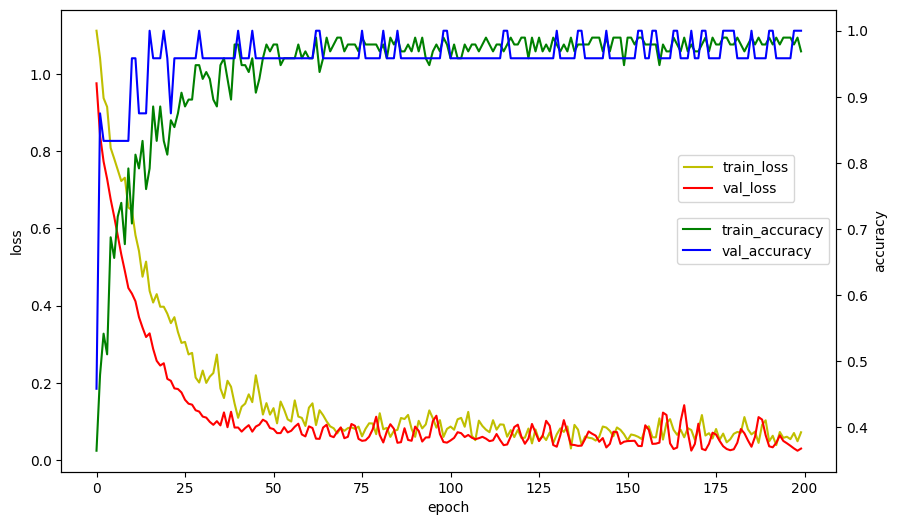

In [14]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

# 2. sklearn 이용
 - 원핫인코딩을 하지 않고 라벨인코딩까지만 해야 작동

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:
# 1. 데이터
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

In [17]:
model = MLPClassifier(
            hidden_layer_sizes=(64, 128, 50), # hidden layer의 units 수
            activation='relu',
            solver='adam', # sgd등의 optimizer
            batch_size=40,
            max_iter=1000, # 학습 최대 횟수
            early_stopping=True, # 조기 종료 활성화
            n_iter_no_change=20, # earlyStopping의 patience와 유사
            validation_fraction=0.1, # 검증셋 비율
            warm_start=False # True일 경우 이전학습에 이어서 학습
)

In [18]:

model.fit(train_X, train_y)

MLPClassifier(batch_size=40, early_stopping=True,
              hidden_layer_sizes=(64, 128, 50), max_iter=1000,
              n_iter_no_change=20)

In [19]:
model.score(test_X, test_y)

0.9333333333333333

In [20]:
iris_X[0]

array([5.1, 3.5, 1.4, 0.2])

In [21]:
# 모델 사용
input_data = [[5.1, 3.5, 1.4, 0.2]]
model.predict(input_data)

array([0])

In [23]:
# 교차표
# test_y : 실제값
hat_y = model.predict(test_X)
pd.crosstab(test_y, hat_y)

col_0,0,1,2
row_0,,,
0,10,0,0
1,0,9,1
2,0,1,9


# 3. 클래스를 생성하여 모델 생성함수 사용

In [24]:
class DNNClassifier:
    @staticmethod
    def build(input_dim=4, activation='relu'):
#         model = Sequential()
#         model.add(Input(input_dim))
#         model.add(Dense(units=50, activation=activation))
#         model.add(Dense(units=30, activation=activation))
#         model.add(Dense(units=3, activation='softmax'))
        # 모델구성
        model = Sequential([
            Input(input_dim),
            Dense(units=50, activation=activation),
            Dense(units=30, activation=activation),
            Dense(units=3, activation='softmax')
        ])
        # 학습 설정
        model.compile(loss='sparse_categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])
        return model  

In [25]:
# 1. 데이터
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# 2. 모델
model = DNNClassifier.build(input_dim=4, activation='elu')
# 3. 모델 학습
hist = model.fit(train_X, train_y, epochs=50, validation_split=0.1, verbose=0)

(120, 4) (120,) (30, 4) (30,)


In [26]:
# 모델 평가
loss, accuracy = model.evaluate(test_X, test_y)
print(f'정확도 : {accuracy*100} %')

1/1 [==============================] - 0s 17ms/step - loss: 0.1340 - accuracy: 0.9333
정확도 : 93.33333373069763 %


# 4. 함수형 API
 - 병렬처리, Residual block

In [27]:
# 기존 model 스타일1
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
# 기존 model 스타일2
model = Sequential([
    Input(shape=(4,)),
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=3, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 50)                250       
                                                                 
 dense_12 (Dense)            (None, 30)                1530      
                                                                 
 dense_13 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 기존 model 스타일3 (함수형 API)
from tensorflow.keras import Model
input_ = Input(shape=(4,))
layer1 = Dense(units=50, activation='relu')(input_)
layer2 = Dense(units=30, activation='relu')(layer1)
output = Dense(units=3, activation='softmax')(layer2)
model = Model(inputs=input_, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_14 (Dense)            (None, 50)                250       
                                                                 
 dense_15 (Dense)            (None, 30)                1530      
                                                                 
 dense_16 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 병렬처리 방식
from tensorflow.keras.layers import concatenate
input_ = Input(shape=(4,))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=80, activation='relu')(input_)
dense3 = Dense(units=30, activation='relu')(input_)
x = concatenate([dense1, dense2, dense3])
output = Dense(units=3, activation='softmax')(x)

In [30]:
# 리지듀얼 블얼(Residual Block)
    #딥러닝에서 기울기 소실 문제로 학습이 잘 되지 않는 부분을 해결하기 위한 제안
from tensorflow.keras.layers import add
input_ = Input(shape=(4, ))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=50, activation='relu')(dense1)
dense3 = add([dense1, dense2])
output = Dense(units=3, activation='softmax')(dense3)
model = Model(inputs=input_, outputs=output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_21 (Dense)               (None, 50)           250         ['input_7[0][0]']                
                                                                                                  
 dense_22 (Dense)               (None, 50)           2550        ['dense_21[0][0]']               
                                                                                                  
 add (Add)                      (None, 50)           0           ['dense_21[0][0]',               
                                                                  'dense_22[0][0]']         

In [31]:
# 학습과정 설정 & 학습
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=100, verbose=0)

In [32]:
# 학습 평가
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)
print(f'accuracy : {accuracy}')

accuracy : 0.9333333373069763
